In [19]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
os.chdir('C:\coursera\Optiver-Realized-Volatility-Prediction\data')

## all unique stock ids in book data
# same stocks are also in trade data 
subset_paths = glob.glob('book_train.parquet/stock_id=*')
unique_stocks_id = []
for path in subset_paths:
    unique_stocks_id.append(int(path.split('=')[1]))

unique_stocks_id = np.sort(np.array(unique_stocks_id))
print('total # stocks: ',len(unique_stocks_id))
unique_stocks_id


total # stocks:  112


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  46,  47,  48,  50,  51,  52,  53,  55,  56,  58,
        59,  60,  61,  62,  63,  64,  66,  67,  68,  69,  70,  72,  73,
        74,  75,  76,  77,  78,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       118, 119, 120, 122, 123, 124, 125, 126])

In [29]:
## single stock book data 
## check how prices are distributed in the book data so that we can see how log(s_t2/s_t1) transformation of prices below and above 1 affects volatitliy.
st_min_bid_price = []
st_max_bid_price = []
st_min_ask_price = []
st_max_ask_price = []

for st_id in unique_stocks_id:

    st_min_bid_price.append(book_train["bid_price1"].min())
    st_max_bid_price.append(book_train["bid_price1"].max())
    st_min_ask_price.append(book_train["ask_price1"].min())
    st_max_ask_price.append(book_train["ask_price1"].max())
    if st_id != 1: # selec the stock to display here
        continue
    book_train = pd.read_parquet('book_train.parquet/stock_id='+str(st_id))
    select_id = st_id
    print(book_train["bid_price1"].max())
    print(book_train["bid_price1"].min())

all_st_min_ask_price = np.min(np.array(st_min_ask_price))
all_st_max_ask_price = np.min(np.array(st_max_ask_price))
all_st_min_bid_price = np.min(np.array(st_min_bid_price))
all_st_max_bid_price = np.min(np.array(st_max_bid_price))

print(f'min ask price in all stocks: {all_st_min_ask_price}')
print(f'max ask price in all stocks: {all_st_max_ask_price}')
print(f'min bid price in all stocks: {all_st_min_bid_price}')
print(f'max bid price in all stocks: {all_st_max_bid_price}')


print('stock id '+str(select_id))
book_train

1.0492502450942993
0.9374724626541138
min ask price in all stocks: 0.9381779432296753
max ask price in all stocks: 1.0636060237884521
min bid price in all stocks: 0.9374724626541138
max bid price in all stocks: 1.0492502450942993
stock id 1


,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,5,0,1.000754,1.001542,1.000689,1.001607,1,25,25,100
1,5,1,1.000754,1.001673,1.000689,1.001739,26,60,25,100
2,5,2,1.000754,1.001411,1.000623,1.001476,1,25,25,125
3,5,3,1.000754,1.001542,1.000689,1.001607,125,25,126,36
4,5,4,1.000754,1.001476,1.000623,1.001542,100,100,25,25
...,...,...,...,...,...,...,...,...,...,...
1507527,32767,588,0.998911,0.999109,0.998812,0.999208,126,42,101,100
1507528,32767,589,0.998911,0.999109,0.998812,0.999208,126,126,101,200
1507529,32767,591,0.998911,0.999109,0.998812,0.999208,126,226,101,200
1507530,32767,592,0.998911,0.999109,0.998812,0.999208,226,225,101,100


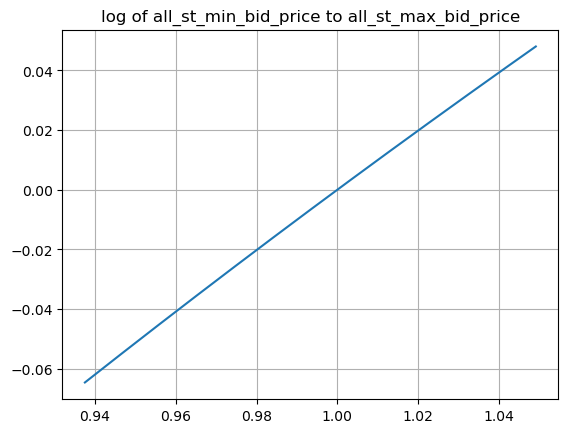

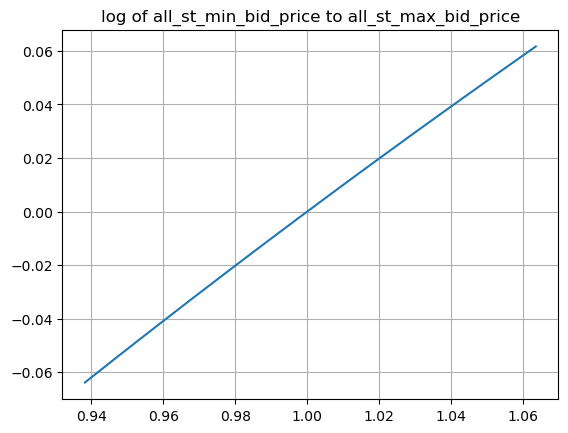

In [25]:
## due to log nature check if non-linearity is visible
## Non-linearity is NOT visible as variance in price is low. so NO need to treat prices < 1 differently from prices > 1.

plt.figure()
plt.plot(np.arange(all_st_min_bid_price,all_st_max_bid_price,0.0001),np.log(np.arange(all_st_min_bid_price,all_st_max_bid_price,0.0001)),)
plt.title("log of all_st_min_bid_price to all_st_max_bid_price")
plt.grid()
plt.show()

plt.figure()
plt.plot(np.arange(all_st_min_ask_price,all_st_max_ask_price,0.0001),np.log(np.arange(all_st_min_ask_price,all_st_max_ask_price,0.0001)),)
plt.title("log of all_st_min_ask_price to all_st_max_ask_price")
plt.grid()
plt.show()